In [49]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


**Implementation of Gradient Boosting Classifier on MNIST Dataset from scratch**

Extracting the MNIST dataset

In [2]:
! cp /content/gdrive/MyDrive/SML_Assignment-4/mnist.zip .
! unzip mnist.zip -d mnist/

Archive:  mnist.zip
   creating: mnist/mnist/
  inflating: mnist/mnist/readme.txt  
  inflating: mnist/mnist/train-labels-idx1-ubyte.gz  
  inflating: mnist/mnist/train-images-idx3-ubyte.gz  
  inflating: mnist/mnist/t10k-images-idx3-ubyte.gz  
  inflating: mnist/mnist/t10k-labels-idx1-ubyte.gz  


In [3]:
import numpy as np
import matplotlib.pyplot as plt

Visualizing one image of the MNIST Dataset

(60000, 28, 28)
(10000, 28, 28)
Label : 5


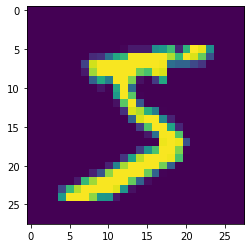

In [4]:
import gzip
def images_file_read(file_name):
    with gzip.open(file_name, 'r') as f:
        # first 4 bytes is a magic number
        magic_number = int.from_bytes(f.read(4), 'big')
        # second 4 bytes is the number of images
        image_count = int.from_bytes(f.read(4), 'big')
        # third 4 bytes is the row count
        row_count = int.from_bytes(f.read(4), 'big')
        # fourth 4 bytes is the column count
        column_count = int.from_bytes(f.read(4), 'big')
        # rest is the image pixel data, each pixel is stored as an unsigned byte
        # pixel values are 0 to 255
        image_data = f.read()
        images = np.frombuffer(image_data, dtype=np.uint8)\
            .reshape((image_count, row_count, column_count))
        return images
def labels_file_read(file_name):
    with gzip.open(file_name, 'r') as f:
        # first 4 bytes is a magic number
        magic_number = int.from_bytes(f.read(4), 'big')
        # second 4 bytes is the number of labels
        label_count = int.from_bytes(f.read(4), 'big')
        # rest is the label data, each label is stored as unsigned byte
        # label values are 0 to 9
        label_data = f.read()
        labels = np.frombuffer(label_data, dtype=np.uint8)
        return labels
train_x2 = images_file_read("mnist/mnist/train-images-idx3-ubyte.gz")
print(train_x2.shape)
train_y2 = labels_file_read("mnist/mnist/train-labels-idx1-ubyte.gz")
test_x2 = images_file_read("mnist/mnist/t10k-images-idx3-ubyte.gz")
print(test_x2.shape)
test_y2 = labels_file_read("mnist/mnist/t10k-labels-idx1-ubyte.gz")
plt.imshow(train_x2[0])
print("Label :" ,  train_y2[0])

In [5]:
print(train_x2.shape)
print(test_x2.shape)
print(train_y2.shape)
print(test_y2.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


Normalizing and then centralizing the dataset

In [6]:
train_x = (train_x2 / 255) - 0.5
test_x = (test_x2 / 255) - 0.5

In [7]:
train_x = train_x.reshape((-1, 784))
test_x = test_x.reshape((-1, 784))

The first prediction is the mean.From here on we will minimize the error at each step from the mean model

In [8]:
pred1 = np.mean(train_y2)

Calculating error from the first prediction

In [9]:
res1 = train_y2 - pred1

In [10]:
res1

array([ 0.54606667, -4.45393333, -0.45393333, ...,  0.54606667,
        1.54606667,  3.54606667])

In [11]:
from sklearn.tree import DecisionTreeRegressor

In [12]:
regressorList = list()

In [13]:
regressor = DecisionTreeRegressor(max_depth = 1)

In [14]:
regressorList.append(regressor)

We fit the decision tree on the error between the first prediction and the actual output

In [15]:
regressor.fit(train_x,res1)

DecisionTreeRegressor(max_depth=1)

In [16]:
pred2 = regressor.predict(train_x)

In [17]:
train_x.shape

(60000, 784)

In [18]:
pred2

array([ 0.91320399, -1.82846423,  0.91320399, ...,  0.91320399,
        0.91320399,  0.91320399])

In [19]:
pred2.shape

(60000,)

In [20]:
learning_rate = 0.1

pred_f2 denotes the second prediction which is improved from the initial prediction 

In [21]:
pred_f2 = pred1 + learning_rate*pred2

In [22]:
res3 = train_y2 - pred_f2

In [23]:
res3

array([ 0.45474627, -4.27108691, -0.54525373, ...,  0.45474627,
        1.45474627,  3.45474627])

Again we fit the decision tree on the error between the second prediction and the  actual output

In [24]:
regressor.fit(train_x,res3)

DecisionTreeRegressor(max_depth=1)

In [25]:
regressorList.append(regressor)

In [26]:
pred3 = regressor.predict(train_x)

pred_f3 denotes the third prediction which is again better than the second one

In [27]:
pred_f3 = pred1 + learning_rate*pred2 + learning_rate*pred3 

Similarly, we keep on obtaining errors between the prediction and the actual output.Train a decision tree on the errors.Then improve our prediction by adding the new prediction of the residual error multiplied by the leaning rate to the previous prediction .We do this procedure till the error becomes less than a certain threshold.

In [28]:
res4 = train_y2 - pred_f3

In [29]:
res4

array([ 0.37255791, -4.10652513, -0.62744209, ...,  0.37255791,
        1.37255791,  3.37255791])

In [30]:
regressor.fit(train_x,res4)

DecisionTreeRegressor(max_depth=1)

In [31]:
regressorList.append(regressor)

In [32]:
pred4 = regressor.predict(train_x)

In [33]:
pred_f4 = pred1 + learning_rate*pred2 + learning_rate*pred3 + learning_rate*pred4

In [34]:
res5 = train_y2 - pred_f4

In [35]:
res5

array([ 0.29797995, -3.95727968, -0.70202005, ...,  0.29797995,
        1.52180336,  3.29797995])

In [36]:
regressor.fit(train_x,res5)

DecisionTreeRegressor(max_depth=1)

In [37]:
regressorList.append(regressor)

In [38]:
pred5 = regressor.predict(train_x)

In [39]:
pred_f5 = pred1 + learning_rate*pred2 + learning_rate*pred3 + learning_rate*pred4 + learning_rate*pred5

In [40]:
pred_f5

array([4.76853931, 3.80931293, 4.76853931, ..., 4.76853931, 4.54471591,
       4.76853931])

In [41]:
regressorList

[DecisionTreeRegressor(max_depth=1),
 DecisionTreeRegressor(max_depth=1),
 DecisionTreeRegressor(max_depth=1),
 DecisionTreeRegressor(max_depth=1)]

In [42]:
prediction = np.mean(test_x)
for i in range(4):
  prediction = prediction + learning_rate*regressorList[i].predict(test_x)

In [43]:
prediction

array([-0.10140835, -0.95935239, -0.95935239, ..., -0.10140835,
       -0.10140835, -0.10140835])

Here a method is defined to do the repititive process of gradient descent.It accepts the training data,learning rate and the number of iterations as the input and returns a list containing the final prediction as its first element and a list containing all the intermediate decision tree models as the second element.

In [44]:
def gradient_boosting(train_x,train_y,iter,learning_rate):
  flag=0
  pred_list = list()
  mu = -1e10
  pred = -1e10
  regressorList = list()
  mu = np.mean(train_y)
  pred = mu
  for i in range(iter):
    res = train_y - pred
    regressor = DecisionTreeRegressor(max_depth = 1)
    regressorList.append(regressor)
    regressor.fit(train_x,res)
    pred_inter = regressor.predict(train_x)
    pred_list.append(pred_inter)
    pred = mu 

    for j in range(i):
      pred = pred + learning_rate*pred_list[j]
      
  return [pred,regressorList]

Here reg_list is the list containing all the intermediate decision tree models

In [45]:
reg_list = gradient_boosting(train_x,train_y2,5,0.1)[1]

The below method "predictor" finds the prediction for a test sample

In [46]:
def predictor(test_x,lr,regr_list,iter):
  prediction = np.mean(test_x)
  for i in range(iter):
    prediction = prediction + lr*regr_list[i].predict(test_x)
  return prediction

In [47]:
pred = np.rint(predictor(test_x,0.1,reg_list,5))

In [48]:
from sklearn.metrics import accuracy_score
accuracy_score(test_y2,pred)

0.0144